# Testing

In [1]:
# imports
import os
import numpy as np
import geopandas as gpd
#import folium as fm
import panel as pn
import pandas as pd
import geopandas as gpd
#import geoviews as gv
import hvplot as hvp

# setup extensions
pn.extension()
#gv.extension('bokeh')

# set display
%matplotlib inline
#%matplotlib notebook

# set data dir
data_dir = '/opt/app/data/DarkPeak'
json_dir = 'DarkPeak_zonalstatsdata'

In [ ]:
# list files in data_dir
files = os.listdir(data_dir)
print(files)

In [ ]:
# read the shapefile as a geodataframe
gdf = gpd.read_file(os.path.join(data_dir, files[0]))

print (os.path.join(data_dir, files[0]))
# get the CRS
gdf.crs

In [ ]:
# reproject the geodataframe to a new gdf
newgdf = gdf.to_crs("EPSG:4326")

In [ ]:
#import pandas as pd
#import holoviews as hv
#import geoviews as gv
import geoviews.feature as gf
#import cartopy
#import cartopy.feature as cf

#from geoviews import opts
#from cartopy import crs as ccrs

#gv.extension('matplotlib', 'bokeh')

#gv.output(dpi=120, fig='svg')


(gf.ocean + gf.land + gf.ocean * gf.land * gf.coastline * gf.borders).cols(3)
#gv.Shape.from_shapefile(shapefile, crs=ccrs.PlateCarree())

In [ ]:
# NO LONGER USED

## create folium map
#def get_map(lat=52.5, long=0.5, zoom_start=7):
#    return fm.Map(location=[lat,long], zoom_start=zoom_start)

#map = get_map()

## convert gdf to json and add to map
#fm.GeoJson(newgdf.to_json()).add_to(map)

## display map as panel object
#pn.panel(map)

In [ ]:
# list files in data_dir
files = os.listdir(os.path.join(data_dir, json_dir))
#print(files)

#df = pd.read_json(os.path.join(data_dir, json_dir, files[0]))
df = pd.read_json(os.path.join(data_dir, json_dir, 'DarkPeak_full_zonal_stats.json'))

type(df)

In [ ]:
def select_row(row=0):
    row = df.loc[row]
    return row

pn.interact(select_row, row=(0, len(df)-1))

In [ ]:
#import panel as pn
#import numpy as np
import holoviews as hv
#pn.extension()
hv.extension('bokeh')

_indices = ['NDVI','NDWI']
#_cities     = {'Asia':['Singapore','Seoul','Shanghai'],
#              'America':['Boston','Toronto','Quito','Santiago'],
#              'Europe':['Madrid','London','Paris','Lisbon']}
select_indices = pn.widgets.Select(name='Index',options=_indices, value=_indices[0])
#select_city      = pn.widgets.Select(name='City',     options=_cities[select_continent.value], value=_cities[select_continent.value][0])

#@pn.depends(select_continent.param.value, watch=True)
#def _update_cities(continent):
#    cities = _cities[continent]
#    select_city.options = cities
#    select_city.value = cities[0]
    
@pn.depends(select_indices.param.value)
def get_plot(index):
    data = df[df["index"] == index]
    return data.hvp(x="ID", y=["mean"])
    #return hv.Curve(data, ).opts(title=index, width=500)
pn.Column(pn.Row(select_indices), get_plot)

In [ ]:
data = df[df["index"] == 'NDVI']
data.hvplot(x="ID", y=["min", "max"])

In [ ]:
column.append(text)

In [ ]:
df[df["index"] == 'NDVI'].plot(x="ID", y=["min", "mean", "max"])

In [ ]:
# what does this do?

data = df[df["index"] == 'NDVI']
data = data.set_index('ID')

data.tail()

In [ ]:
data['LEID'].min()

In [ ]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

#%matplotlib notebook
%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='median', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

find_outliers(variable='median', window=10, sigma=10)

In [ ]:
pn.interact(find_outliers)

In [ ]:
myopts = ['Biology', 'Chemistry', 'Physics']
select = pn.widgets.Select(name='Select', options=myopts)

select

In [ ]:
import numpy as np
import pandas as pd
import hvplot.pandas  # noqa

#index = pd.date_range('1/1/2000', periods=1000)
#df = pd.DataFrame(np.random.randn(1000, 4), index=index, columns=list('ABCD')).cumsum()

#df.head()
df[df["index"] == 'NDWI'].hvplot(x="ID", y=["min", "max"])

In [ ]:
df = pd.read_json(os.path.join(data_dir, json_dir, 'DarkPeak_full_zonal_stats.json'))


In [ ]:
data = df[df["index"] == 'NDVI']
data = data.set_index('ID')
data2 = data[data["LEID"] == 591258]
data2.tail()

In [ ]:
import hvplot.pandas
data2.hvplot.line(x="date", y=["min", "max"]) * data2.hvplot.scatter(x="date", y=["min", "max"])

In [ ]:
import holoviews as hv
from holoviews import opts
from holoviews.plotting.links import DataLink
hv.extension('bokeh')


from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

counties = [dict(county, Unemployment=unemployment[cid])
            for cid, county in counties.items()
            if county["state"] == "tx"]

county_data = [(county['detailed name'], county['Unemployment']) for county in counties]

choropleth = hv.Polygons(counties, ['lons', 'lats'], [('detailed name', 'County'), 'Unemployment'], label='Texas Unemployment')
table = hv.Table(county_data, [('detailed name', 'County'), 'Unemployment'])

print(len(choropleth.data), len(table))

DataLink(choropleth, table)

(choropleth + table).opts(
    opts.Table(height=428),
    opts.Polygons(width=500, height=500,  tools=['hover', 'tap'], xaxis=None, 
                  yaxis=None, color_index='Unemployment'))

# Imports

In [ ]:
import panel as pn
import holoviews as hv

# Functions

In [ ]:
def get_data(dschoice):
    return print(dschoice.value)


# Widgets

### Widget 1: Dataset selection

In [ ]:
# create list of potential analysis areas
dataset_opts = ['Yorks', 'Dark Peak', 'England']
# create selection widget
slct_data = pn.widgets.Select(name='Choose dataset', options=dataset_opts)
slct_data


### Widget 2: Index selection

In [ ]:
# find unique indices in df_in 
uniqueInd = list(df_in['index'].unique())

# create selection widget
slct_index = pn.widgets.RadioButtonGroup(name='Index chooser', \
                                          options=uniqueInd, button_type='default')

### Widget 3: Select temporal requirement

In [ ]:
# create list of potential analysis areas
dataset_opts2 = ['Month', 'Season']
# create selection widget
slct_data2 = pn.widgets.Select(name='Choose temporal filter', options=dataset_opts2)
slct_data2

### Widget 4: Select statistic

In [ ]:
# find unique indices in df_in 
#uniqueStat = list(df_in['index'].unique()) # NEED TO GET THIS PROGRAMATTICALLY
uniqueStat = ['Mean', 'Median']

# create selection widget
slct_stat = pn.widgets.RadioButtonGroup(name='Statistic chooser', \
                                          options=uniqueStat, button_type='primary', value=uniqueStat[0])
slct_stat

### Widget 5: Save as image

In [ ]:
#??

### Layout tests

In [ ]:
a = pn.Column(
    slct_stat,
    pn.Row(
        slct_data,
        slct_data2
    )
)
a

In [ ]:
# set directories for options used in area_select
# area_select.value: [path to shp, path to json]
data_locn = [['Dark Peak', '/opt/app/data/DarkPeak/DarkPeak_LE_Segments_Spatialjoin_10m_formatted.shp', \
                           '/opt/app/data/DarkPeak/DarkPeak_zonalstatsdata/DarkPeak_full_zonal_stats.json'], \
             ['Yorks', 'null', 'null'], 
             ['England', 'null', 'null']
            ]
slct_data

In [ ]:

#Now that it is loaded we will create a slider which we will eventually use to select the row of the dataframe 
#that we want to display:

#df is dataframe
row_slider = pn.widgets.IntSlider(value=0, start=0, end=len(df)-1)

#Next we create a Pane to display the current row of the dataframe with times formatted nicely:

row_pane = pn.panel(df.loc[row_slider.value])
#Now that we have defined both the widget and the object we want to update, we can declare a callback to link the two. 
#As we learned in the previous section, assigning a new value to the object of a pane will update the display. In the 
#callback we select the row of the dataframe and then assign it to the pane.object:

def df_callback(event):
    row_pane.object = df.loc[event.new]

#Lastly we actually have to register this callback. To do so we provide the callback and the parameter we want to trigger 
#the event on the slider's .param.watch method:

row_slider.param.watch(df_callback, 'value')

#Now that everything is connected up, we can put both the widget and the pane in a panel and display them:

pn.Column(row_slider, row_pane, width=400)

#As you can see, this process is slightly more laborious than pn.interact or even the pn.depends approach, but doing 
#it in this way should help you see how everything fits together and can be useful to more precisely control callbacks 
#that update particular parameters or the contents of a larger layout.

In [ ]:
import holoviews as hop
import numpy as np

line_plot = hop.Curve(np.random.rand(10)).opts(width=400)
line_plot

In [ ]:
print(line_plot.kdims)

In [ ]:
import geoviews as gv
import geoviews.feature as gf

from geoviews import opts
from cartopy import crs

gv.extension('bokeh')

#projections = [crs.RotatedPole, crs.LambertCylindrical, crs.Geostationary, 
#               crs.AzimuthalEquidistant, crs.OSGB, crs.EuroPP, crs.Gnomonic,
#               crs.Mollweide, crs.OSNI, crs.Miller, crs.InterruptedGoodeHomolosine,
#               crs.SouthPolarStereo,  crs.Orthographic, crs.NorthPolarStereo, crs.Robinson,
#               crs.LambertConformal, crs.AlbersEqualArea]

#proj_layout = gv.Layout([gf.coastline.relabel(group=p.__name__).opts(projection=p(), backend='bokeh')
#                         for p in projections])

#gv.output(proj_layout, backend='bokeh')
shapefile = '/opt/app/data/DarkPeak/DarkPeak_LE_Segments_Spatialjoin_10m_formatted.shp'
gv.Shape.from_shapefile(shapefile, crs=crs.OSGB())

In [ ]:
import holoviews as hv
import panel as pn
from holoviews import streams
hv.extension("bokeh") 

#ellipse = hv.Ellipse(0, 0, 1) 
pointer = streams.PointerXY(x=1, y=0) # x=0 and y=0 are the initialized values

print(pointer.contents)

def crosshair(x, y):
    yellow=str(pointer.contents['x'])
    return pn.pane.Markdown(yellow) #hv.HLine(y) * hv.VLine(x) 

pn.Row(ellipse* hv.DynamicMap(crosshair, streams=[pointer]))

In [ ]:
from datetime import datetime
 
dates = '2020-10-10' 
time_in_datetime = datetime.strptime(dates, "%Y-%m-%d")
 
print(" Time in Datetime Format :", time_in_datetime)

In [ ]:
def test(my_num):
    orig = my_num
    new = orig*2
    return orig, new
a = test(10)
print(a[0])

In [ ]:
import param
class GoogleMapViewer(param.Parameterized):
    
    continent = param.ObjectSelector(default='Asia', objects=['Africa', 'Asia', 'Europe'])
    
    country = param.ObjectSelector(default='China', objects=['China', 'Thailand', 'Japan'])
    
    _countries = {'Africa': ['Ghana', 'Togo', 'South Africa', 'Tanzania'],
                  'Asia'  : ['China', 'Thailand', 'Japan'],
                  'Europe': ['Austria', 'Bulgaria', 'Greece', 'Portugal', 'Switzerland']}
    
    @param.depends('continent', watch=True)
    def _update_countries(self):
        countries = self._countries[self.continent]
        self.param['country'].objects = countries
        self.country = countries[0]

    @param.depends('country')
    def view(self):
        iframe = """
        <iframe width="800" height="400" src="https://maps.google.com/maps?q={country}&z=6&output=embed"
        frameborder="0" scrolling="no" marginheight="0" marginwidth="0"></iframe>
        """.format(country=self.country)
        return pn.pane.HTML(iframe, height=400)
        
viewer = GoogleMapViewer(name='Google Map Viewer')
pn.Row(viewer.param, viewer.view)

In [ ]:
df.hvplot.area(x='date', y=['open', 'close'], stacked=False,
               groupby='date.year', legend='bottom_right', width=500)

# RESTART

In [ ]:
import param
import panel as pn


import pandas as pd

pn.extension()

class BaseClass(param.Parameterized):
    string_value = param.String(default='Yo', doc='A string')
    
class Example(BaseClass):
    color = param.Color(default='#667788')
    hello = pd.util.testing.makeDataFrame().iloc[:3]
    string = param.String(default=str(hello.iloc[1,1]))
    #data = [10, 11, 12, 27, 29, 48]
    
pn.Row(Example.param, BaseClass.param)

### An amended example from the docs

In [ ]:
import pandas as pd
import hvplot.pandas

class Example2(param.Parameterized):
    lastval = param.Number(33)
    
    @param.depends("lastval")
    def plot(self):
        data = {
            "horiz": [5, 10, 15, 20, 25],
            "vert": [11, 8, 17, 25, self.lastval],
        } 
        dataframe = pd.DataFrame(data)
        myplot = dataframe.hvplot.scatter(x="horiz", y="vert", size=6, color="#007BFF", responsive=True)
        fig = myplot
        fig = fig.opts(
            min_height=400,
            toolbar=None,
            yticks=list(range(0, 50, 10)),
            ylim=(0, 50),
            show_grid=True,
        )
        return fig


class SomeThing(param.Parameterized):
    theplotclass = param.ClassSelector(class_=Example2, default=Example2())
    
mything = SomeThing()




pn.Row(pn.Param(mything.theplotclass), mything.theplotclass.plot)

### The example from Panel docs

In [ ]:
import pandas as pd
import hvplot.pandas

class PowerCurve(param.Parameterized):
    firstval = param.Number(1079)
    one_min = param.Number(684)
    
    @param.depends("firstval", "one_min")
    def plot(self):
        data = {
            "duration": [10 / 60, 1, 10, 20, 60],
            "power": [self.firstval, self.one_min, 12, 12, 500],
        }
        dataframe = pd.DataFrame(data)
        line_plot = dataframe.hvplot.line(
            x="duration", y="power", line_color="#007B33", line_width=3, responsive=True,
        )
        scatter_plot = dataframe.hvplot.scatter(
            x="duration", y="power", marker="o", size=6, color="#007BFF", responsive=True
        )
        fig = line_plot * scatter_plot
        gridstyle = {"grid_line_color": "black", "grid_line_width": 0.1}
        fig = fig.opts(
            min_height=400,
            toolbar=None,
            yticks=list(range(0, 2000, 200)),
            ylim=(0, 2000),
            gridstyle=gridstyle,
            show_grid=True,
        )
        return fig

class Athlete(param.Parameterized):
    power_curve = param.ClassSelector(class_=PowerCurve, default=PowerCurve())
    
athlete = Athlete()


#def new_class(cls, **kwargs):
#    "Creates a new class which overrides parameter defaults."
#    return type(type(cls).__name__, (cls,), kwargs)

columns_view = pn.Param(
    athlete.power_curve)

power_curve_view = pn.Row(
    columns_view,
    pn.layout.VSpacer(width=50),
    athlete.power_curve.plot
)
power_curve_view


In [ ]:
markdown = pn.pane.Markdown("Textule")
text_input = pn.widgets.TextInput(value=markdown.object)

text_input.link(markdown, value='object')

pn.Row(text_input, markdown)

In [ ]:
m = pn.pane.Markdown("")
t = pn.widgets.TextInput()

def mycallback(target, event):
    target.object = event.new.upper() + " 2021"

t.link(m, callbacks={'value': mycallback})
t.value = "Wotcha"
pn.Row(t, m)

In [ ]:
import panel as pn
import geopandas as gpd
import geoviews as gv
import geoviews.tile_sources as gts
# setup extensions
pn.extension()
gv.extension('bokeh')

#Get shape data
data_locn = {'Dark Peak': ['/opt/app/data/DarkPeak/DarkPeak_LE_Segments_Spatialjoin_10m_formatted.shp', \
                           '/opt/app/data/DarkPeak/DarkPeak_zonalstatsdata/DarkPeak_full_zonal_stats.json']} 

proc_areas = ['Dark Peak']
area_select = pn.widgets.Select(name='Select area to process', options=proc_areas)
             
# load data based on result of selection - shapefile and json
shp_file = data_locn[area_select.value][0]
#jsn_file = data_locn[area_select.value][1]

# read the shapefile as a geodataframe
gdf_in = gpd.read_file(shp_file)

# clean and filter
to_keep = ['polygon_id', 'ID', 'main_habit', 'Confidence', 'area_m', 'geometry'] 
shp_data = gdf_in[to_keep]
          
# reproject the geodataframe to a new gdf
shp_data = shp_data.to_crs("EPSG:4326")

polys = gv.Polygons(shp_data, vdims=['main_habit', 'area_m', 'polygon_id'])
mymap = gts.EsriImagery * polys.opts(color='main_habit', cmap='Category20', width=600, height=350, tools=['hover', 'tap'])

#polys
jj = pn.Column(mymap)
jj             
             
             
             

In [ ]:
import holoviews as hv
m = pn.pane.Markdown("")

sel = hv.streams.Selection1D(source=polys)
m.object = str(sel.index[0])
#a = stream.index
#str(a[0])
pn.Row(m)

In [ ]:
# from https://discourse.holoviz.org/t/selecting-polygon-s-with-holoviews/261

#import geopandas as gpd
#import geoviews as gv
#import holoviews as hv
#gv.extension('bokeh')
#hv.extension('bokeh')

#countries = gpd.read_file('https://github.com/johan/world.geo.json/raw/master/countries.geo.json')

polys = gv.Polygons(shp_data, vdims=['main_habit'])

sel = hv.streams.Selection1D(source=polys, index=[0])

polys.opts(
    tools=['hover', 'tap'], width=600,
)


pn.Row(polys) 

In [ ]:
sel.index


In [ ]:
import geopandas as gpd
import geoviews as gv
import holoviews as hv
gv.extension('bokeh')
hv.extension('bokeh')

df = gpd.read_file('https://raw.githubusercontent.com/ajggeoger/JNCCLocalIndex/main/data/DarkPeak/datasubset.geojson')
to_keep = ['polygon_id', 'ID', 'main_habit', 'Confidence', 'Area_Ha', 'geometry'] 
mydf = df[to_keep]
mydf = mydf.to_crs("EPSG:4326")

polys = gv.Polygons(mydf, vdims=['main_habit'])

sel = hv.streams.Selection1D(source=polys)#, index=[0])

polys.opts(
    tools=['hover', 'tap'], width=600,
)


pn.Row(polys, mydf.iloc[sel.index]) 
# but what I really want is the information from mydf to be updated every time a polygon is clicked
# and for it to be saved as a variable that I can use to slice a different dataframe


In [ ]:
#sel.index
#pn.Row(polys, mydf.iloc[sel.index])
frank = hv.DynamicMap(polys)
frank.opts(
    tools=['hover', 'tap'], width=300,
)
frank

In [ ]:
print(selection.index)

In [ ]:
import panel as pn
pn.extension()
str_pane = pn.pane.Str('selection.index', style={'font-size': '12pt'})
col_pick = pn.widgets.ColorPicker(value='#ffeedd')
int_slide = pn.widgets.IntSlider(name='Int Slider', start=50, end=350, step=50)
#html_pane = pn.pane.HTML('', width=200, height=200, background=col_pick.value)
html_pane = pn.pane.HTML('', width=int_slide.value, height=200, background=col_pick.value)

#col_pick.link(html_pane, value='background') #link col_pick 'value' with html_pane 'background' 
int_slide.link(html_pane, value='width') #link col_pick 'value' with html_pane 'background' 
pn.Column(html_pane, int_slide)

In [ ]:
text_input = pn.widgets.TextInput(value='Simon')

@pn.depends(text_input.param.value)
def title_text(value):
    #return 'Hello ' + value
    return pn.pane.HTML(value, style={'background-color': '#F6F6F6', 'border': '2px solid black'})

app = pn.Row(text_input, title_text)
app

In [ ]:
a = pn.widgets.Spinner(value=10)
b = pn.widgets.Spinner(value=20)

@pn.depends(a.param.value, b.param.value) # parameter/variable that is watched
def title_text(value1, value2): # references the inputs in depends - names can be anything
    c = (str(value1) + str(value2)) # some function based on inputs
    return pn.pane.HTML(c, style={'background-color': '#F6F6F6', 'border': '2px solid black'})

app2 = pn.Column(pn.Row(a, title_text), b)
app2

In [ ]:
import holoviews as hv
hv.extension('bokeh')
from holoviews import streams

pointer = streams.PointerXY(x=0, y=0)

def crosshair(x,y):
    #return hv.Polygons([hv.Box(i, i, i) for i in range(1, 10)]) * hv.HLine(y) * hv.VLine(x) 
    return hv.Ellipse(0,0,1) * hv.HLine(y) * hv.VLine(x)

hv.DynamicMap(crosshair, streams=[pointer])


In [ ]:
import geopandas as gpd
import geoviews as gv
import holoviews as hv
import hvplot
import hvplot.pandas
gv.extension('bokeh')
hv.extension('bokeh')

#newgdf

df2 = gpd.read_file('https://raw.githubusercontent.com/ajggeoger/JNCCLocalIndex/main/data/DarkPeak/datasubset.geojson')
to_keep = ['polygon_id', 'ID', 'main_habit', 'Confidence', 'Area_Ha', 'geometry'] 
mydf = df2[to_keep]
mydf = mydf.to_crs("EPSG:4326")

polys = gv.Polygons(mydf, vdims=['main_habit'])

sel = hv.streams.Selection1D(source=polys, index=[0])

polys.opts(
    tools=['hover', 'tap'], width=400,
)


def get_selection(index):
    polyno = mydf.iloc[sel.index]['polygon_id'].tolist()
    data1 = df[df['ID'].isin(polyno)]
    plot2 = data1[data1["index"] == 'NDVI'].groupby(['month']).mean().hvplot.line(x='month', 
                                                                                  y='mean', 
                                                                                  color='green', 
                                                                                  title='Plot of a polygon')
    return plot2 #mydf.iloc[sel.index]

pn.Column(polys, pn.bind(get_selection, index=sel.param.index))




#rslt_df = shp_data.loc[shp_data['main_habit'] == slct_hab] 
#    test_list = rslt_df['polygon_id'].tolist()
#    data = df_in[df_in['ID'].isin(test_list)]



#data = df[df["index"] == 'NDVI']
#data.hvplot(x="ID", y=["min", "max"])


#pn.Row(polys, mydf.iloc[sel.index]) 
# but what I really want is the information from mydf to be updated every time a polygon is clicked
# and for it to be saved as a variable that I can use to slice a different dataframe


In [ ]:
pn.__version__

In [ ]:
#from bokeh.sampledata import sea_surface_temperature as sst
mydates =  pd.date_range(start='2019-01-01', end='2019-12-31')
thedata = pd.DataFrame(mydates, columns=['dates']) 
thedata['count'] = 0
mydata = thedata.sample(3)
mydata
thedata.loc[(thedata.dates == mydata.dates), 'count'] = 1
thedata
#df_in.loc[(df_in['ID'] == 100) & (df_in['index'] == 'RVI') & (df_in['year'] == 2019)]
#polyno = mydf.iloc[sel.index]['polygon_id'].tolist()
#    data1 = df_in[df_in['ID'].isin(polyno)]
#mydata = pd.Series()
#df = sst.sea_surface_temperature
#aa = df.sample(200)
#aa['temperature'] = 1
#aa
#aa.hvplot.heatmap(x='time.month', y='time.day', C='temperature', 
#                  height=500, width=500, colorbar=False)

In [ ]:
import geopandas as gp
import geoviews as gv

import panel as pn
pn.extension()

file_input = pn.widgets.FileInput()

file_input


poly1 = gp.read_file('/opt/app/data/DarkPeak/DarkPeak_LE_Segments_Spatialjoin_10m_formatted.shp')
poly2 = gp.read_file('/opt/app/data/DarkPeak/clip_test.shp')
data = []
#for index, orig in poly1.iterrows():
#    for index2, ref in poly2.iterrows():      
#        if ref['geometry'].intersects(orig['geometry']): 
#            owdspd=orig['id']
#            data.append({'geometry':ref['geometry'].intersection(orig['geometry']),'wdspd':owdspd})

#for geom in data: 
#    print(geom)
res_intersection = gp.overlay(poly1, poly2, how='intersection')#how='intersection')
data = res_intersection.to_crs("EPSG:4326")

polys = gv.Polygons(data)
polys

In [19]:
import hvplot.pandas  # noqa
from bokeh.sampledata import sea_surface_temperature as sst

df = sst.sea_surface_temperature
my_title = ('This a plot of ' + "% s") % 'temperature'

df.hvplot.heatmap(x='time.month', y='time.day', C='temperature', 
                  title=my_title, height=500, width=500, colorbar=False)

:HeatMap   [time.month,time.day]   (temperature)

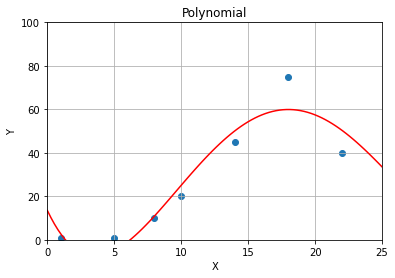

[-6.99599554  4.52447215 38.83823581 59.2930694  39.69023857  5.81295484]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = [1, 5, 8, 10, 14, 18, 22, 27, 34]
Y = [1, 1, 10, 20, 45, 75, 40, 23, 12]

# Train Algorithm (Polynomial)
degree = 4
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plot data
xx = np.linspace(0, 26, 100)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 25, 0, 100])
plt.grid(True)
plt.scatter(X, Y)
plt.show()

# Predict price
aa = poly_fit([3, 7, 12, 19, 24, 30])
print(aa)

<AxesSubplot:xlabel='Yr', ylabel='Tmax'>

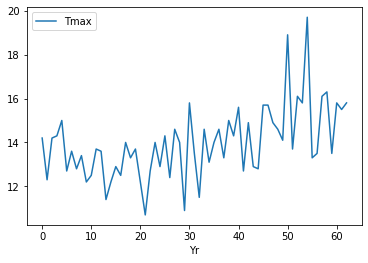

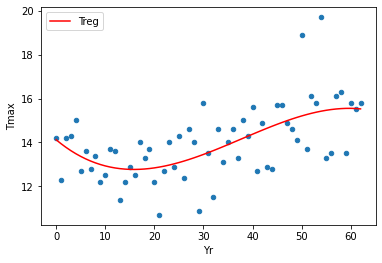

In [17]:
import pandas as pd
weather = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv')

july = weather.query('Month == 4')
july.insert(0,'Yr',range(0,len(july)))

july.plot(y='Tmax',x='Yr')

n=3
d = np.polyfit(july['Yr'],july['Tmax'],n)
f = np.poly1d(d)

july.insert(6,'Treg',f(july['Yr']))

ax = july.plot(x = 'Yr',y='Tmax', kind='scatter')
july.plot(x='Yr', y='Treg',color='Red',ax=ax)

In [ ]:
# based on https://www.thepythoncode.com/article/get-hardware-system-information-python

import psutil
def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
        
# let's print CPU information
print("="*40, "CPU Info", "="*40)
# number of cores
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
print(f"Total CPU Usage: {psutil.cpu_percent()}%")

# Memory Information
print("="*40, "Memory Information", "="*40)
# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")
print(f"Percentage: {svmem.percent}%")

# Disk Information
print("="*40, "Disk Information", "="*40)
print("Partitions and Usage:")
usage = psutil.disk_usage('/')
print(f"Total disk: {get_size(usage.total)}")
print(f"Used: {get_size(usage.used)}")
print(f"Free: {get_size(usage.free)}")
print(f"Percentage: {usage.percent}%")


In [ ]:
from rtree import index
idx = index.Index()
left, bottom, right, top = (0.0, 0.0, 1.0, 1.0)
idx.insert(0, (left, bottom, right, top))
list(idx.nearest((1.0000001, 1.0000001, 2.0, 2.0), 1))